Import the libraries and load the data.

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [83]:
df = pd.read_csv('KAG_conversion_data.csv')

In [84]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


Dummy encode any categorical or object values in the data and save the resulting data 
frame to variable X.


In [86]:
X = pd.get_dummies(df)
X.head()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,708746,916,103916,15,7350,1,1.43,2,1,1,0,0,0,0,1
1,708749,916,103917,16,17861,2,1.82,2,0,1,0,0,0,0,1
2,708771,916,103920,20,693,0,0.00,1,0,1,0,0,0,0,1
3,708815,916,103928,28,4259,1,1.25,1,0,1,0,0,0,0,1
4,708818,916,103928,28,4133,1,1.29,1,1,1,0,0,0,0,1


Using a heat map to show the correlation in the data.

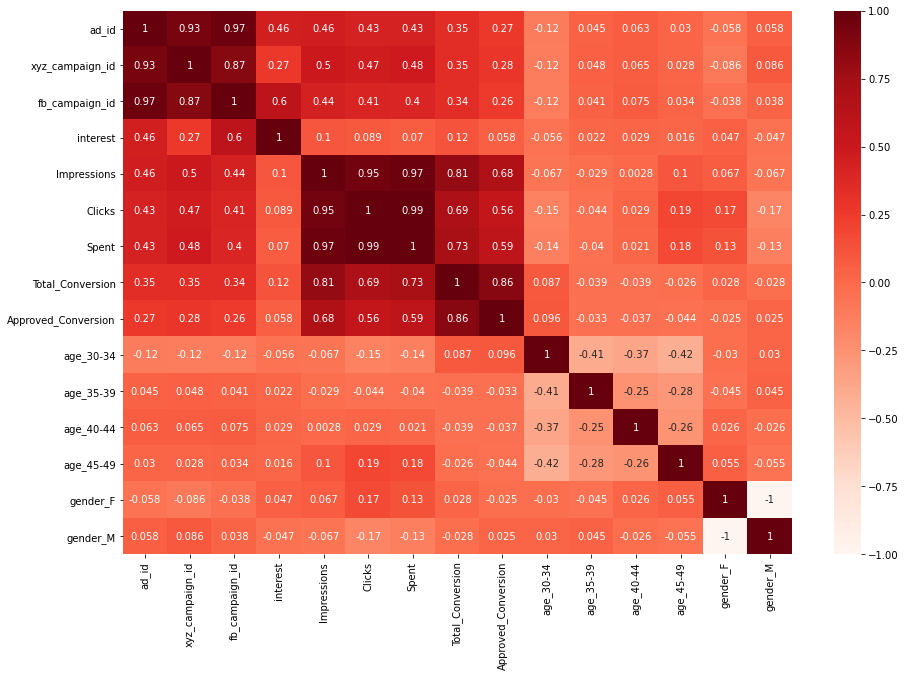

In [87]:
plt.figure(figsize=(15,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [88]:
X = X.drop(['ad_id','xyz_campaign_id','fb_campaign_id','interest'],axis=1)

In [56]:
X.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M
0,7350,1,1.43,2,1,1,0,0,0,0,1
1,17861,2,1.82,2,0,1,0,0,0,0,1
2,693,0,0.00,1,0,1,0,0,0,0,1
3,4259,1,1.25,1,0,1,0,0,0,0,1
4,4133,1,1.29,1,1,1,0,0,0,0,1


Using the elbow method: 
a. Determine the best number of clusters for the data in the range of 2 to 20. 
b. Also include the graphical plot for the elbow curve.


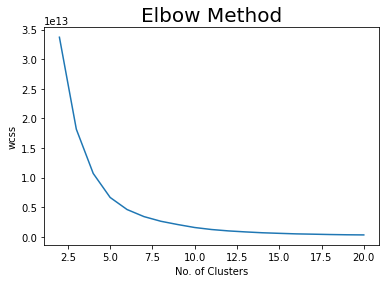

In [89]:
from sklearn.cluster import KMeans

wcss = []
for i in range(2, 21):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(2, 21), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

5 seems to be the optimal number of clusters

Based on the result above in 4b use the value at your elbow point to cluster the values in 
the data frame X.

In [90]:
km = KMeans(n_clusters=5)

In [91]:
y_means = km.fit_predict(X)

In [92]:
km.labels_

array([1, 1, 1, ..., 4, 0, 0])

In [93]:
y_means

array([1, 1, 1, ..., 4, 0, 0])

In [94]:
y_means is km.labels_

True

In [95]:
km.cluster_centers_

array([[5.73265480e+05, 1.05830000e+02, 1.61038800e+02, 6.53000000e+00,
        1.98000000e+00, 3.00000000e-01, 1.80000000e-01, 1.70000000e-01,
        3.50000000e-01, 6.30000000e-01, 3.70000000e-01],
       [3.09154602e+04, 5.53183024e+00, 8.30858091e+00, 1.27984085e+00,
        4.54907162e-01, 4.08488064e-01, 2.24137931e-01, 1.68435013e-01,
        1.98938992e-01, 4.68169761e-01, 5.31830239e-01],
       [2.16847700e+06, 3.02666667e+02, 5.00788334e+02, 3.23333333e+01,
        1.23333333e+01, 6.66666667e-01, 0.00000000e+00, 1.66666667e-01,
        1.66666667e-01, 3.33333333e-01, 6.66666667e-01],
       [1.05593859e+06, 1.94841270e+02, 2.99217936e+02, 1.24126984e+01,
        3.92063492e+00, 2.69841270e-01, 2.06349206e-01, 1.74603175e-01,
        3.49206349e-01, 6.19047619e-01, 3.80952381e-01],
       [2.42104682e+05, 4.23636364e+01, 6.58237273e+01, 3.04545455e+00,
        9.86363636e-01, 3.04545455e-01, 2.18181818e-01, 2.45454545e-01,
        2.31818182e-01, 4.27272727e-01, 5.72727273e-

In [96]:
X['Advert_Type'] = y_means
X.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49,gender_F,gender_M,Advert_Type
0,7350,1,1.43,2,1,1,0,0,0,0,1,1
1,17861,2,1.82,2,0,1,0,0,0,0,1,1
2,693,0,0.00,1,0,1,0,0,0,0,1,1
3,4259,1,1.25,1,0,1,0,0,0,0,1,1
4,4133,1,1.29,1,1,1,0,0,0,0,1,1


In [97]:
X['Advert_Type'].value_counts()

1    754
4    220
0    100
3     63
2      6
Name: Advert_Type, dtype: int64

Using any form of distribution plot of your choice and the original data frame, plot 2 
graphs that can be used to answer the following:
a. Which advert type lead to the highest and consistent amount of sales by 
customers of all the age brackets?
b. Does the company xyz have gender bias in terms of their ad spending? Are their 
products gender neutral?


In [98]:
Data = X.groupby(['Advert_Type'])['Approved_Conversion'].sum().reset_index()

In [99]:
Data

,Advert_Type,Approved_Conversion
0,0,198
1,1,343
2,2,74
3,3,247
4,4,217


In [100]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [101]:
df['Advert_Type'] = y_means

In [102]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,1
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,1
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,1
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


In [103]:
Data = df.groupby('Advert_Type')['Approved_Conversion'].sum().reset_index()

In [104]:
Data

,Advert_Type,Approved_Conversion
0,0,198
1,1,343
2,2,74
3,3,247
4,4,217


Text(0, 0.5, 'Approved Conversion')

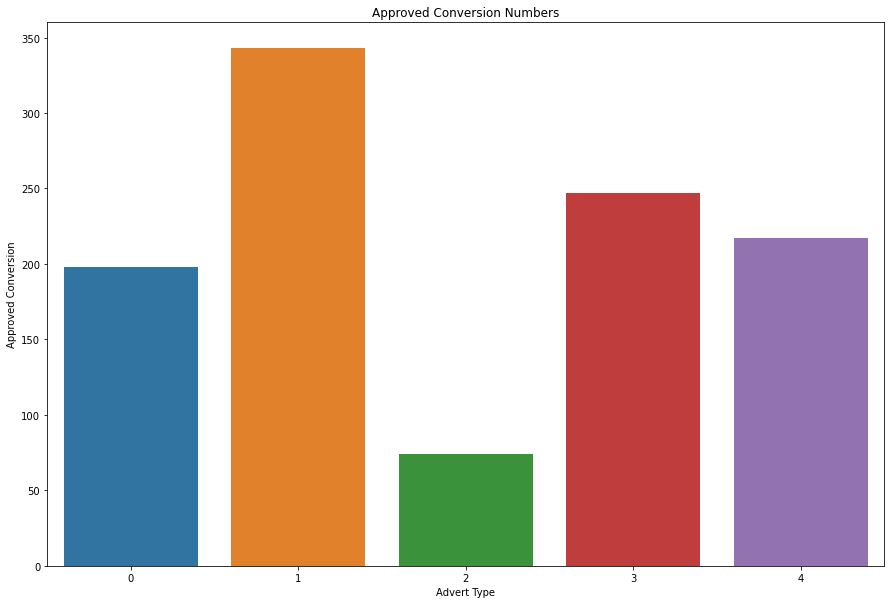

In [105]:
plt.figure(figsize=(15,10))
sns.barplot(x="Advert_Type", y="Approved_Conversion", data=Data)
plt.title("Approved Conversion Numbers")
plt.xlabel("Advert Type")
plt.ylabel("Approved Conversion")

Advert type 1 has led to the highest and consistent amount of sales by customers of all the age bracket.

In [106]:
Data2 = df.groupby('gender')['Spent'].sum().reset_index()

In [107]:
Data2

,gender,Spent
0,F,34502.619963
1,M,24202.609995


Text(0, 0.5, 'Total Spend')

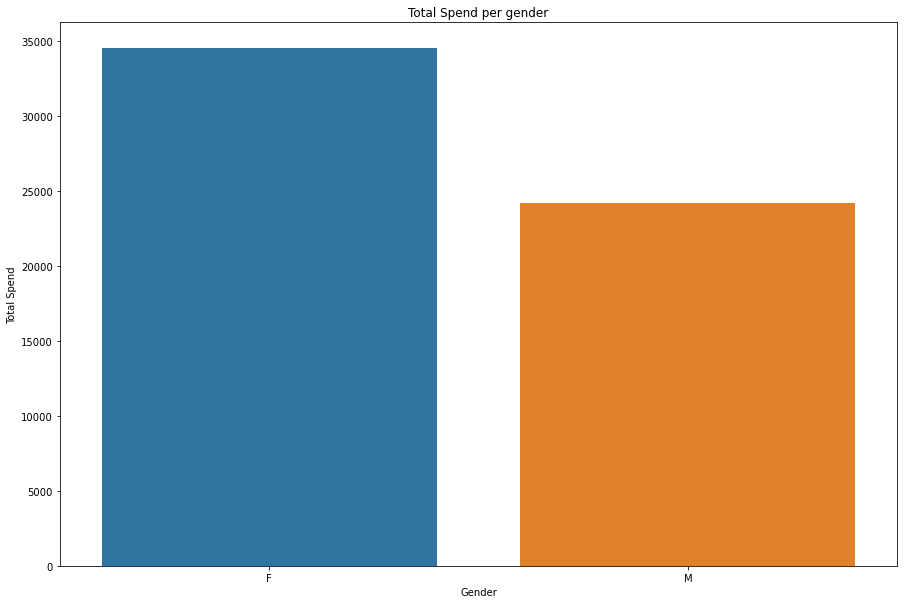

In [108]:
plt.figure(figsize=(15,10))
sns.barplot(x="gender", y="Spent", data=Data2)
plt.title("Total Spend per gender")
plt.xlabel("Gender")
plt.ylabel("Total Spend")

The company xyz has a gender bias in terms of their ad spending. They spent 10,000 more on the female gender than on the male gender

Perform the same analysis using hierarchical clustering and compare the results in terms
of the number of useable clusters